# Pair Programming EDA

Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.

- Buscar un conjunto de datos a analizar

- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado

- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.

- Interpretación de los resultados.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

In [39]:
df = pd.read_csv("../archivos/telco_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_prueba = pd.read_csv("../archivos/telco_customer_churn.csv", na_values= ' ')   #cd esto es lo de cesar

In [40]:
nomcol = {col: col.lower() for col in df.columns}

In [41]:
df.rename(columns = nomcol, inplace=True)

In [42]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


*Elegimos 'churn' como variable respuesta.*

In [43]:
def exploracion(dataframe):
    '''
    Función que nos permite explorar varios aspectos de un dataframe mostrando
    unas filas, el numero de filas y columnas, los tipos de datos, la cantidad de nulos por columna,
    la cantidad de filas duplicadas, y los principales estadísticos.
        Parametros:
                dataframe (dataframe): un dataframe que queremos explorar
                nombre (string): un titulo para el dataframe
    '''
    print(".............................................")
    print(f"En el dataframe hay {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas.")
    print(".............................................")    
    print(f"5 filas aleatorias:")
    display(dataframe.sample(5))
    print(".............................................")
    print(f"Los tipos de data por columna del dataframe son:")
    display(dataframe.dtypes.reset_index())
    print(".............................................")
    print(f"La cantidad de nulos por columna del dataframe son:")
    display(dataframe.isnull().sum().reset_index())
    print(".............................................")
    print(f"El porcentaje de nulos por columna del dataframe son:")
    display(dataframe.isnull().sum() * 100 / dataframe.shape[0])
    print(".............................................")
    if dataframe.duplicated().sum() != 0:
        print(f"En el dataframe hay {dataframe.duplicated().sum()} filas duplicadas.")
    else:
        print(f"No hay filas duplicadas.")
    print(".............................................")
    print(f"Los principales estadísticos de las columnas numéricas son:")
    display(dataframe.describe())
    print(".............................................")
    print(f"Los principales estadísticos de las columnas categóricas son:")
    display(dataframe.describe(include=object))
    print(".............................................")

In [44]:
eda = exploracion(df)

.............................................
En el dataframe hay 7043 filas y 21 columnas.
.............................................
5 filas aleatorias:


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
184,1918-ZBFQJ,Female,0,No,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,79.25,1111.65,Yes
5577,4163-HFTUK,Male,0,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.10,1007.8,No
5549,0329-GTIAJ,Female,0,No,No,3,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,97.90,315.3,Yes
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
6997,2523-EWWZL,Female,0,Yes,No,27,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,76.10,2093.4,No


.............................................
Los tipos de data por columna del dataframe son:


,index,0
0,customerid,object
1,gender,object
2,seniorcitizen,int64
3,partner,object
4,dependents,object
5,tenure,int64
6,phoneservice,object
7,multiplelines,object
8,internetservice,object
9,onlinesecurity,object


.............................................
La cantidad de nulos por columna del dataframe son:


,index,0
0,customerid,0
1,gender,0
2,seniorcitizen,0
3,partner,0
4,dependents,0
5,tenure,0
6,phoneservice,0
7,multiplelines,0
8,internetservice,0
9,onlinesecurity,0


.............................................
El porcentaje de nulos por columna del dataframe son:


customerid          0.0
gender              0.0
seniorcitizen       0.0
partner             0.0
dependents          0.0
tenure              0.0
phoneservice        0.0
multiplelines       0.0
internetservice     0.0
onlinesecurity      0.0
onlinebackup        0.0
deviceprotection    0.0
techsupport         0.0
streamingtv         0.0
streamingmovies     0.0
contract            0.0
paperlessbilling    0.0
paymentmethod       0.0
monthlycharges      0.0
totalcharges        0.0
churn               0.0
dtype: float64

.............................................
No hay filas duplicadas.
.............................................
Los principales estadísticos de las columnas numéricas son:


,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


.............................................
Los principales estadísticos de las columnas categóricas son:


,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


.............................................


In [45]:
df['seniorcitizen'] = df['seniorcitizen'].astype('category')

In [46]:
df = df.drop(df[df['totalcharges']==' '].index)

In [47]:
df['totalcharges'] = df['totalcharges'].astype('float64')

In [48]:
df[['streamingmovies', 'streamingtv']].value_counts()

streamingmovies      streamingtv        
No                   No                     2017
Yes                  Yes                    1939
No internet service  No internet service    1520
Yes                  No                      792
No                   Yes                     764
Name: count, dtype: int64

In [49]:
df['streamingmovies'].value_counts()

streamingmovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64

In [50]:
df['streamingtv'].value_counts()

streamingtv
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64

In [51]:
df.sample(10)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4051,8152-VETUR,Female,0,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Credit card (automatic),97.70,6869.70,No
1374,8999-YPYBV,Male,0,Yes,Yes,45,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,84.35,3858.05,No
1549,4237-RLAQD,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.85,45.85,Yes
1372,9793-WECQC,Male,0,No,No,23,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Mailed check,95.30,2192.90,No
3118,2122-SZZZD,Male,0,No,No,44,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.50,835.50,No
1581,2782-JEEBU,Male,0,No,No,21,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,36.00,780.15,No
1474,9495-SKLKD,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.95,4456.65,No
6169,4847-QNOKA,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.90,44.90,Yes
919,5149-TGWDZ,Female,0,No,No,21,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,104.55,2239.40,No
1503,0481-SUMCB,Female,1,No,No,45,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),102.15,4735.35,No


In [52]:
df['contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [53]:
df['streamingtv'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [54]:
df['streamingmovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [55]:
numericas = df.select_dtypes(include=np.number)

In [56]:
mask = np.triu(np.ones_like(numericas.corr(),dtype = np.bool_))

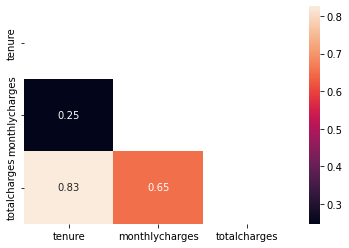

In [57]:
sns.heatmap(numericas.corr(), annot=True, mask=mask);

In [58]:
def similar_variables(lista_variables,plot = True):
    for columna in lista_variables:
        print(' Los valores únicos para la variable',columna, 'son:', list( df[columna].unique()))
        value_counts = df[columna].value_counts()
        if plot == True:
            plt.figure()
            value_counts.plot.pie(figsize=(8,8))
        else:
            pass

 Los valores únicos para la variable streamingtv son: ['No', 'Yes', 'No internet service']
 Los valores únicos para la variable streamingmovies son: ['No', 'Yes', 'No internet service']


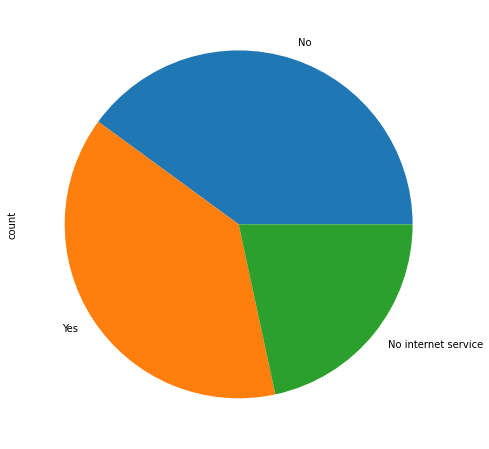

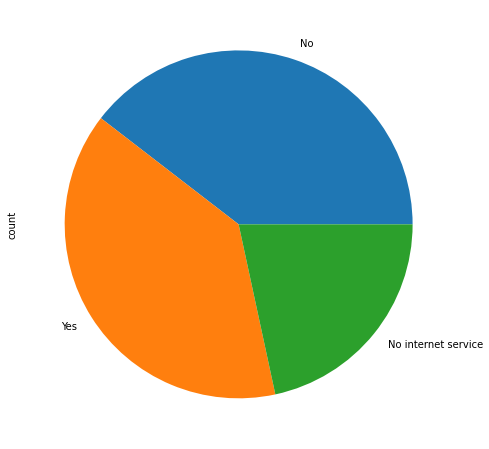

In [59]:
streaminglist = ['streamingtv','streamingmovies']
similar_variables(streaminglist)

In [60]:
df.drop('streamingmovies', axis = 1, inplace=True)

Podemos pensar en eliminar alguna de estas dos columnas, ya que sus porcentajes son muy similares y pueden resultar redundantes.

<Figure size 1080x1080 with 0 Axes>

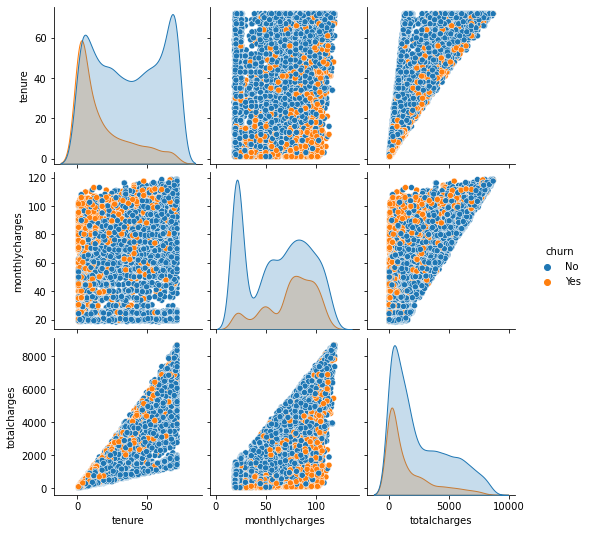

In [61]:
plt.figure(figsize=(15, 15))

sns.pairplot(df, hue= 'churn')

In [62]:
categoricas = df.select_dtypes(exclude=np.number)

In [63]:
categoricas.drop(['customerid','churn'], axis=1, inplace=True)

In [64]:
len(categoricas.columns)

15

In [65]:
categoricas.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object')

<AxesSubplot:xlabel='gender', ylabel='count'>

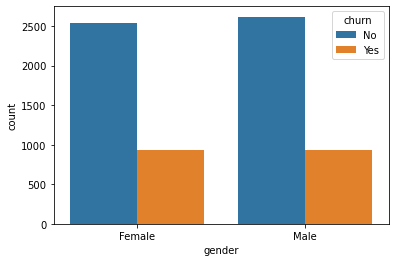

In [66]:
sns.countplot(x = 'gender', data = df, hue='churn' )

In [67]:
# fig, axes = plt.subplots(15, figsize=(15,30))
# axes = axes.flat

# for indice, columna in enumerate(categoricas.columns):
#     sns.countplot(x = categoricas[columna], hue='churn', data = df, ax=axes[indice]);

# plt.tight_layout()
# fig.delaxes(axes[indice])
# plt.show()

In [68]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [69]:
df['totalcharges'] = df['totalcharges'].astype('float64')

In [70]:
df.describe(include='object').T

,count,unique,top,freq
customerid,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
partner,7032,2,No,3639
dependents,7032,2,No,4933
phoneservice,7032,2,Yes,6352
multiplelines,7032,3,No,3385
internetservice,7032,3,Fiber optic,3096
onlinesecurity,7032,3,No,3497
onlinebackup,7032,3,No,3087
deviceprotection,7032,3,No,3094


In [72]:
df.shape

(7032, 20)

In [71]:
df.to_pickle("../archivos/telco_customer_churn.pkl")